<a href="https://colab.research.google.com/github/shiva-tech-code/QR-Code-Generator-/blob/main/QR_code.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install qrcode

In [ ]:
!pip install pyzbar

In [ ]:
!apt install libzbar0

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following additional packages will be installed:
  fonts-droid-fallback fonts-noto-mono fonts-urw-base35 ghostscript gsfonts imagemagick-6-common
  libdjvulibre-text libdjvulibre21 libfftw3-double3 libgs9 libgs9-common libidn12 libijs-0.35
  libjbig2dec0 libjxr-tools libjxr0 liblqr-1-0 libmagickcore-6.q16-6 libmagickcore-6.q16-6-extra
  libmagickwand-6.q16-6 libv4l-0 libv4lconvert0 libwmflite-0.2-7 poppler-data
Suggested packages:
  fonts-noto fonts-freefont-otf | fonts-freefont-ttf fonts-texgyre ghostscript-x libfftw3-bin
  libfftw3-dev inkscape poppler-utils fonts-japanese-mincho | fonts-ipafont-mincho
  fonts-japanese-gothic | fonts-ipafont-gothic fonts-arphic-ukai fonts-arphic-uming fonts-nanum
The following NEW packages will be installed:
  fonts-droid-fallback fonts-noto-mono fonts-urw-base35 ghostscript gsfonts imagemagick-6-common
  libdjvulibre-text libdjvulibre21 libfftw3-doub

In [ ]:
import qrcode
import cv2
import numpy as np
import sqlite3
from pyzbar.pyzbar import decode
from PIL import Image
import os

def init_db():
    """Initializes the database to store QR codes."""
    conn = sqlite3.connect('qr_codes.db')
    cursor = conn.cursor()
    cursor.execute('''CREATE TABLE IF NOT EXISTS qr_history (
                        id INTEGER PRIMARY KEY AUTOINCREMENT,
                        data TEXT,
                        filename TEXT)''')
    conn.commit()
    conn.close()

def save_to_db(data, filename):
    """Saves QR code data and filename to the database."""
    conn = sqlite3.connect('qr_codes.db')
    cursor = conn.cursor()
    cursor.execute("INSERT INTO qr_history (data, filename) VALUES (?, ?)", (data, filename))
    conn.commit()
    conn.close()

def generate_qr(data, filename='qr_code.png', color='black', bg_color='white', save_db=True):
    """Generates a QR code with customization options."""
    qr = qrcode.QRCode(
        version=1,
        error_correction=qrcode.constants.ERROR_CORRECT_H,
        box_size=10,
        border=4
    )
    qr.add_data(data)
    qr.make(fit=True)
    img = qr.make_image(fill_color=color, back_color=bg_color)
    img.save(filename)
    print(f"QR Code saved as {filename}")
    if save_db:
        save_to_db(data, filename)

def read_qr(image_path):
    """Reads and decodes QR code from an image file."""
    img = cv2.imread(image_path)
    detected_qrs = decode(img)
    for qr in detected_qrs:
        data = qr.data.decode('utf-8')
        print(f"Decoded Data: {data}")
        return data
    print("No QR code found.")
    return None

def read_qr_from_webcam():
    """Reads QR code from a live webcam feed."""
    cap = cv2.VideoCapture(0)
    while True:
        _, frame = cap.read()
        decoded_objects = decode(frame)
        for obj in decoded_objects:
            data = obj.data.decode('utf-8')
            print(f"Scanned QR Code: {data}")
            cap.release()
            cv2.destroyAllWindows()
            return data
        cv2.imshow("QR Scanner", frame)
        if cv2.waitKey(1) & 0xFF == ord('q'):
            break
    cap.release()
    cv2.destroyAllWindows()
    return None

def generate_bulk_qr(data_list):
    """Generates multiple QR codes at once."""
    if not os.path.exists("bulk_qr_codes"):
        os.makedirs("bulk_qr_codes")
    for i, data in enumerate(data_list):
        filename = f"bulk_qr_codes/qr_{i+1}.png"
        generate_qr(data, filename)
    print("Bulk QR codes generated.")

# Initialize database
init_db()

# Example usage
generate_qr("https://alliance.edu.in", "alliance_qr.png", color='blue', bg_color='white')
read_qr("alliance_qr.png")


QR Code saved as alliance_qr.png
No QR code found.


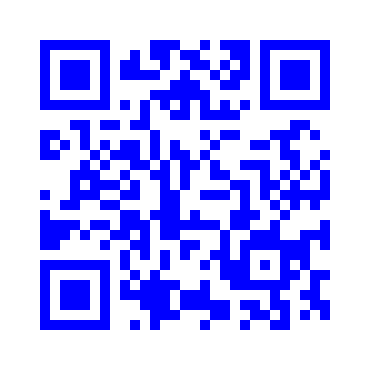

In [ ]:
from IPython.display import display
from PIL import Image

# Show the generated QR code
img = Image.open("alliance_qr.png")
display(img)


In [ ]:
def read_qr_colab(image_path):

    img = Image.open(image_path)
    detected_qrs = decode(img)

    if detected_qrs:
        for qr in detected_qrs:
            data = qr.data.decode('utf-8')
            print(f"Decoded Data: {data}")
            return data
    else:
        print("No QR code found.")
        return None

# Use this instead of read_qr()
read_qr_colab("alliance_qr.png")


Decoded Data: https://alliance.edu.in


'https://alliance.edu.in'

In [ ]:
import os
print("File exists:", os.path.exists("alliance_qr.png"))


File exists: True


In [ ]:
generate_qr("https://alliance.edu.in", "alliance_qr.png", color='blue', bg_color='white')


QR Code saved as alliance_qr.png


In [ ]:
read_qr_colab("alliance_qr.png")


Decoded Data: https://alliance.edu.in


'https://alliance.edu.in'